## Public Interest in Sports-related Concussion over Time

### Author : Kiran K.
### Date: August 1, 2020

#### Summary:

1. Mild traumatic brain injury, or concussion, is a prominent issue for healthcare professionals and athletes. Given the increase in public interest regarding concussion-related dysfunction, it would be helpful to learn how individuals' interest in this disorder changes over time. This data can help moderate healthcare professionals' efficient management of sports-related head injury.


2. Public interest in concussion was operationalized as the relative frequency of concussion-pertinent searches performed using the Google search engine from July 1, 2010 to July 1, 2020. Searches were focused on American football.


3. Public interest in sports and sports-related mild traumatic brain injury was best expressed in the keywords 'football', 'ding', 'concussion', and 'NFL.' People's degree of interest was affected by the presence of contemporary major sports and entertainment events. Texans performed the most concussion-related searches in the United States, although this was most likely due to its high representation in the dataset as compared to other states. 


4. Data suggest that patients may report more concussion symptoms if there is a sports event or media event near the time of their visit. Individuals from certain states may be more likely to report concussion symptoms than others, although more data would be needed from less represented states to make a more definitive conclusion about this possibility.

#### Introduction:

A [concussion](https://en.wikipedia.org/wiki/Concussion) is defined as a disruption in neurologic functioning following some type of traumatic injury to the brain (Powell & McCrea, 2011). Over the years, individuals across the country have expressed significant concerns about post-concussion sequela, which has been driven - in part - by greater academic research on this condition and increased awareness of head injuries  affecting children and adults in sports, especially in American football. People's interest in concussion can be expressed as the degree to which individuals conduct their own personal research on the condition using the internet, which can affect their report of possible concussion-related symptoms during medical visits. 


Healthcare professionals may consider using population-based information to manage their treatment of patients' complaints. For example, if there is media coverage of an athele who incurred a concussion in a game, people may search for concussion-associated problems and verbalize their findings or concerns about mild traumatic brain injury to physicians or other clinicians, especially if they may also have been personally impacted by such an injury. By including this type of data in their clinical analysis, medical providers will be in a better position to address possible concussion-associated difficulties in their patients (e.g., mitigating fears of post-concussive symptoms following a personal experience of head injury if there are concurrent sociological events that might make one more vulnerable to this type of anxiety or preoccupation).



![title](axonshearing.jpg)

#### Purpose

Explore population-level interest in football and football-associated concussion over time using Google Trends.

#### Hypothesis:

1. Individuals' degree of interest in mild traumatic brain injury will be associated with social and entertainment phenomenon, including sports- and media-related events.

#### Method:

Internet search information will be retrieved from [Google Trends](https://trends.google.com/trends/?geo=US), which is a service that allows users to explore the content and frequency of searches performed using the Google search engine during a specified time period. Exploratory data analysis will be performed to understand how the United States' interest in football-related concussion changes across time and which terms are the most salient for internet users in the country (from a sample of 10 target keywords). A general Google search will be performed afterwards to determine whether social factors might be associated with these observations.

Data will be cleaned, explored, and modeled in Python 3.8 using the packages identified below.

#### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import folium
import webbrowser

Connect to the Google service.

In [2]:
pytrend = TrendReq()

First, I will describe each of the methods within the class. In the Results section, I will instantiate the class to demonstrate its functions.

#### Step-by-step explanation of the "Trend" class.

Develop a class to allow for new search instances. To begin, include a start and end date using a YYYY-MM-DD format.

In [3]:
class Trend:

    # Input dates as YYYY-MM-DD
    def __init__(self, start_date: datetime, end_date: datetime):
        self.start_date = start_date
        self.end_date = end_date
        self.time_period = str(start_date) + ' ' + str(end_date)
        self.df1 = None
        self.cols1 = None
        self.df1_metro = None
        self.df1_rel_queries = None
        self.df2 = None
        self.cols2 = None
        self.df2_metro = None
        self.df2_rel_queries = None
        self.agreement = None
        self.df = None
        self.agreement_geo = None
        self.df_geo = None
        self.terms_mean = None
        self.terms_sum = None
        self.df_T = None
        self.geo_us = None
        self.symptoms1_df()
        self.symptoms2_df()
        self.merge_df()
        self.adjust_df()
        self.merge_geo_df()
        self.data_prep()
        self.hist_fig = None
        self.hist_ax = None
        self.time_fig = None
        self.time_ax = None
        analysis_date = datetime.now()
        print('Data was collected on ' + analysis_date.strftime("%B %d, %Y") + ' at ' +
              analysis_date.strftime("%H:%M:%S") + ' for searches between ' + start_date +
              ' and ' + end_date + '.')

Create a list of search terms to input into the Google Trends search. I identified 10 terms which are commonly associated with  mild traumatic brain injury in football:

1. 'concussion'
2. 'mild traumatic brain injury'
3. 'mTBI'
4. 'post-concussion syndrome'
5. 'ding'
6. 'dinged'
7. 'bell-ringer'
8. 'bell rung'
9. 'football'
10. 'NFL'

Each search is restricted to five keywords, so I will create two methods to extract data for all 10 target keywords. These searches will also contain geographic information represented as Designated Market Areas (DMAs) in the United States, which we will use to create a map of which states conducted the most concussion searches. DMAs are measured by Neilsen (Media market, n.d.). 

In [4]:
    def symptoms1_df(self):
        kw_list1 = ['concussion', 'mild traumatic brain injury', 'mTBI', 'post-concussion syndrome', 'ding']
        pytrend.build_payload(kw_list1, timeframe=self.time_period)
        self.df1 = pytrend.interest_over_time()
        self.cols1 = pd.DatetimeIndex.to_frame(self.df1.axes[0])
        self.df1.insert(loc=0, column='Date', value=self.cols1)
        self.df1_metro = pytrend.interest_by_region(resolution='DMA', inc_geo_code=True)
        self.df1_rel_queries = pytrend.related_queries()

    def symptoms2_df(self):
        kw_list2 = ['dinged', 'bell-ringer', 'bell rung', 'football', 'NFL']
        pytrend.build_payload(kw_list2, timeframe=self.time_period)
        self.df2 = pytrend.interest_over_time()
        self.cols2 = pd.DatetimeIndex.to_frame(self.df2.axes[0])
        self.df2.insert(loc=0, column='Date', value=self.cols2)
        self.df2_metro = pytrend.interest_by_region(resolution='DMA', inc_geo_code=True)
        self.df2_rel_queries = pytrend.related_queries()

I will merge the two keyword dictionaries together. It should be noted that there are constraints to the number of searches Google provides (we are restricted to a maximum of 200 total scaled search counts per row). Furthermore, the quantitative value for searches over time is a <i>relative</i> term. Per Google: "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

For simplicity's sake, I will consolidated similar concepts into a single column (e.g., 'mTBI' and 'mild traumatic brain injury' will be combined to form one column).

In [5]:
    def merge_df(self):
        self.agreement = pd.concat([self.df1.Date, self.df2.Date], axis=1)
        self.agreement['Agree'] = np.where(self.agreement.iloc[:, 0] ==
                                           self.agreement.iloc[:, 1], 1, 0)

        if self.agreement.shape[0] == self.agreement['Agree'].count():
            self.df = pd.merge(left=self.df1, right=self.df2, how='left')
            self.df.set_index(self.df.iloc[:, 0])
        else:
            print("DataFrames' indices do not agree - double check values.")

    def adjust_df(self):
        self.df.drop(['isPartial'], axis=1, inplace=True)
        self.df.set_index('Date')

        # Combine columns of similar content or rename variables.
        # *Unfortunately, I am restricted to a maximum of 200 total scaled search counts total per row.*
        self.df['mTBI'] = self.df['mild traumatic brain injury'] + self.df['mTBI']
        self.df.drop(['mild traumatic brain injury'], axis=1, inplace=True)

        self.df['ding'] = self.df['ding'] + self.df['dinged']
        self.df.drop(['dinged'], axis=1, inplace=True)

        self.df['bell'] = self.df['bell-ringer'] + self.df['bell rung']
        self.df.drop(['bell-ringer'], axis=1, inplace=True)
        self.df.drop(['bell rung'], axis=1, inplace=True)

        self.df = self.df.rename(columns={'post-concussion syndrome': 'pcs'})

    def merge_geo_df(self):
        self.agreement_geo = pd.concat([self.df1_metro.geoCode, self.df2_metro.geoCode], axis=1)
        self.agreement_geo['Agree'] = np.where(self.agreement_geo.iloc[:, 0] ==
                                               self.agreement_geo.iloc[:, 1], 1, 0)

        if self.agreement_geo.shape[0] == self.agreement_geo['Agree'].count():
            self.df_geo = pd.merge(left=self.df1_metro, right=self.df2_metro, how='left')
            self.df_geo.set_index(self.df_geo.iloc[:, 0])
            self.df_geo.insert(loc=1, column='Location', value=self.df1_metro.axes[0])
        else:
            print("DataFrames' indices do not agree - double check values.")

        self.df_geo['mTBI'] = self.df_geo['mild traumatic brain injury'] + self.df_geo['mTBI']
        self.df_geo.drop(['mild traumatic brain injury'], axis=1, inplace=True)

        self.df_geo['ding'] = self.df_geo['ding'] + self.df_geo['dinged']
        self.df_geo.drop(['dinged'], axis=1, inplace=True)

        self.df_geo['bell'] = self.df_geo['bell-ringer'] + self.df_geo['bell rung']
        self.df_geo.drop(['bell-ringer'], axis=1, inplace=True)
        self.df_geo.drop(['bell rung'], axis=1, inplace=True)

        self.df_geo = self.df_geo.rename(columns={'post-concussion syndrome': 'pcs'})

Prepare the dataframe for exploratory data analysis.

In [6]:
    def data_prep(self):
        self.terms_mean = pd.DataFrame(self.df.mean())
        self.terms_sum = pd.DataFrame(self.df.sum())

        self.df_T = self.df.T
        self.df_T['Sum'] = self.df_T[1:13].sum(axis=1)
        self.df_T = self.df_T.reset_index()

        self.df_copy = self.df
        self.df_copy = self.df_copy.set_index('Date')

        # Subset data frame to selected only locations in the United States.
        # It appears that US cities are represented by integer values so those will be retained.
        self.geo_us = self.df_geo
        self.geo_us['geoCode'] = pd.to_numeric(self.geo_us['geoCode'], downcast='signed', errors='coerce')
        self.geo_us = self.geo_us.dropna()
        geo_us = self.geo_us
        return geo_us, self.df

I will visualize the keyword data, then parse through .json data to obtain the latitudes and longitudes of the DMAs in the United States. I will graph the more frequent searches by keyword ('histogram_terms') and track the frequency of these keyword searches over time ('time_terms').

In [7]:
    def histogram_terms(self):
        self.hist_fig, self.hist_ax = plt.subplots(figsize=(12, 10))
        colors = ['violet', 'blue', 'red', 'green', 'black', 'orange', 'yellow']
        start_date_new = parse(start_date).strftime('%B %d, %Y')
        end_date_new = parse(end_date).strftime('%B %d, %Y')
        self.df_T = self.df_T.iloc[1:, ]
        self.df_T.sort_values('Sum', ascending=False, inplace=True)
        sns.barplot(x='index', y='Sum', data=self.df_T, palette=colors, ax=self.hist_ax)
        self.hist_ax.set_title(f'Total Concussion-related Google Search Trends from {start_date_new} to {end_date_new}',
                               fontsize=16, loc='center')
        self.hist_ax.set_xlabel('Search Terms', fontsize=14)
        self.hist_ax.set_ylabel('Sum', fontsize=14)

    def time_terms(self):
        self.time_fig, self.time_ax = plt.subplots(figsize=(16, 8))
        sns.set_style('whitegrid')

        # The color sequence for the histogram is: blue (football), orange (ding), green (concussion), and
        # red (NFL), so I will follow that same structure for the lineplot.
        colors = ['red', 'black', 'orange', 'blue', 'violet', 'green', 'yellow']
        sns.lineplot(data=self.df_copy, dashes=False, palette=colors, ax=self.time_ax)
        self.time_ax.set_title('Concussion-related Google Search Trends over Time', fontsize=20)
        self.time_ax.set_xlabel('Time', fontsize=14)
        self.time_ax.set_ylabel('Degree of Interest (Scaled)', fontsize=14)

    # Use latitude and longitude coordinates to map the DMAs in the US.
    # Credit to Mrk-Nguyen for the .json file containing the region codes:
    # https://github.com/Mrk-Nguyen/dmamap/blob/master/nielsengeo.json
    def prep_json(self):
        coord = open('nielsengeo.json')
        data = json.load(coord)

        coord_dict = []
        for feature in data['features']:
            city = feature['properties']['dma1']
            lat = feature['properties']['latitude']
            long = feature['properties']['longitude']
            dictionary = {
                'Location': city,
                'lat': lat,
                'long': long
            }
            coord_dict.append(dictionary)

        coord_dict = pd.DataFrame(coord_dict)
        return coord_dict

There were a few missing latitude and longitude values in the dataframe, so I completed a Google search to find the correct values and input them into the 'NaN' cells. 

The rows with latitude and longitude coordinates but <i>without</i> Google search counts are already captured in the previously modified cases so these 'NaN' rows will be dropped.

In [8]:
    def merge_geos(g, coords):
        g = g.drop(['geoCode'], axis=1)
        coords['Location'] = coords.Location.str.replace(',', '')

        # Merge 'geo' and 'coordinates' on 'Location', which should be nearly, if not completely, identical.
        geo_coord = pd.merge(left=g, right=coords, on='Location', how='outer')

        # Manually enter the missing ('NaN') values with corresponding values from the 'coordinates'
        # and 'geo' data frames. If they are not available, approximate coordinates by identifying
        # their location with a Google search.
        geo_coord.at[geo_coord['Location'] == 'Anchorage AK', 'lat'] = 61.2181
        geo_coord.at[geo_coord['Location'] == 'Anchorage AK', 'long'] = -149.9003

        geo_coord.at[geo_coord['Location'] == 'Birmingham AL', 'lat'] = 33.50310
        geo_coord.at[geo_coord['Location'] == 'Birmingham AL', 'long'] = -86.86964

        geo_coord.at[geo_coord['Location'] == 'Birmingham (Anniston and Tuscaloosa) AL', 'lat'] = 33.5031
        geo_coord.at[geo_coord['Location'] == 'Birmingham (Anniston and Tuscaloosa) AL', 'long'] = -86.86964

        geo_coord.at[geo_coord['Location'] == 'Boston MA-Manchester NH', 'lat'] = 42.50102
        geo_coord.at[geo_coord['Location'] == 'Boston MA-Manchester NH', 'long'] = -71.46049

        geo_coord.at[geo_coord['Location'] == 'Fairbanks AK', 'lat'] = 64.8378
        geo_coord.at[geo_coord['Location'] == 'Fairbanks AK', 'long'] = -147.7164

        geo_coord.at[geo_coord['Location'] == 'Florence-Myrtle Beach SC', 'lat'] = 34.29878
        geo_coord.at[geo_coord['Location'] == 'Florence-Myrtle Beach SC', 'long'] = -79.41977

        geo_coord.at[geo_coord['Location'] == 'Greenville-Spartanburg SC-Asheville NC-Anderson SC', 'lat'] = 35.05266
        geo_coord.at[geo_coord['Location'] == 'Greenville-Spartanburg SC-Asheville NC-Anderson SC', 'long'] = -82.69770

        geo_coord.at[geo_coord['Location'] == 'Honolulu HI', 'lat'] = 21.3069
        geo_coord.at[geo_coord['Location'] == 'Honolulu HI', 'long'] = -157.8583

        geo_coord.at[geo_coord['Location'] == 'Juneau AK', 'lat'] = 58.3019
        geo_coord.at[geo_coord['Location'] == 'Juneau AK', 'long'] = -134.4197

        geo_coord.at[geo_coord['Location'] == 'Miami-Ft. Lauderdale FL', 'lat'] = 25.43902
        geo_coord.at[geo_coord['Location'] == 'Miami-Ft. Lauderdale FL', 'long'] = -80.94063

        geo_coord.at[geo_coord['Location'] == 'Montgomery (Selma) AL', 'lat'] = 32.05068
        geo_coord.at[geo_coord['Location'] == 'Montgomery (Selma) AL', 'long'] = -86.76757

        geo_coord.at[geo_coord['Location'] == 'Paducah KY-Cape Girardeau MO-Harrisburg-Mount Vernon IL', 'lat'] = 37.23529
        geo_coord.at[geo_coord['Location'] == 'Paducah KY-Cape Girardeau MO-Harrisburg-Mount Vernon IL', 'long'] = -89.49733

        geo_coord.at[geo_coord['Location'] == 'Sioux Falls(Mitchell) SD', 'lat'] = 44.01338
        geo_coord.at[geo_coord['Location'] == 'Sioux Falls(Mitchell) SD', 'long'] = -98.73520

        geo_coord.at[geo_coord['Location'] == 'Wichita-Hutchinson KS', 'lat'] = 33.90593
        geo_coord.at[geo_coord['Location'] == 'Wichita-Hutchinson KS', 'long'] = -99.03978

        geo_coord.at[geo_coord['Location'] == 'Wichita Falls TX & Lawton OK', 'lat'] = 33.90593
        geo_coord.at[geo_coord['Location'] == 'Wichita Falls TX & Lawton OK', 'long'] = -99.03978

        # The rows with latitude and longitude coordinates but without Google search counts are already
        # counted in the cases I modified above. Therefore, the cases deemed 'NaN' will be dropped.
        geo_coord.dropna(inplace=True)
        geo_coord['total'] = geo_coord.iloc[:, 3:9].sum(axis=1)
        return geo_coord

Now that the dataframe is ready for analysis, I will take a broad perspective to understand the relative interest in concussion by state. Since DMA regions are based on specific regions within or across states, I will combine DMAs to map state-level  interest. I will plot this data into an interactive geographic map (.html) of the United States created using folium. Due to how the DMA locations are coded, Vermont, Rhode Island, New Jersey, and Delaware are not included in the dataframe and are thus whited out.

In [9]:
    def map_terms(g_coord):
        # Constants.
        states = 'us-states.json'
        us_lat = 37
        us_long = -102

        # Extract the state from 'Location' so searches conducted within a state can be summed and then mapped
        # in folium. Although some cities overlap with different states, for simplicity's sake, I will only
        # map the last state in the cell.
        g_coord['id'] = g_coord['Location'].str[-2:]
        g_coord = g_coord[['Location', 'id', 'concussion', 'mTBI', 'pcs', 'ding', 'football',
                           'NFL', 'bell', 'total']]
        g_coord = g_coord.sort_values('id')

        # 'Washington DC/Hagerstown MD' is incorrected labeled as state 'D)' so I will rename that cell.
        g_coord.loc[g_coord.id == 'D)', 'id'] = 'MD'

        # Since I will aggregate search trends across states, I will make 'id' the key variable.
        # Group search terms by state and sum the total number of searches per term.
        g_coord.drop(['Location'], axis=1, inplace=True)
        g_coord = g_coord.groupby('id', as_index=False).sum()


        # Due to how the DMA locations are coded, Vermont, Rhode Island, New Jersey, and Delaware
        # are not included in the dataframe and are thus whited out.

        # Create a base map.
        m = folium.Map(
            location=[us_lat, us_long],
            zoom_start=4,
            tiles='cartodbpositron',
        )

        # Map 'football' (purple).
        folium.Choropleth(
            geo_data=states,
            name='Football',
            data=g_coord,
            nan_fill_color='white',
            columns=['id', 'football'],
            key_on='feature.id',
            fill_color='BuPu',
            fill_opacity='0.7',
            line_color='black',
            line_opacity='0.5',
            legend_name='Football (degree of interest)'
        ).add_to(m)

        # Map 'ding' (blue).
        folium.Choropleth(
            geo_data=states,
            name='Ding',
            data=g_coord,
            nan_fill_color='white',
            columns=['id', 'football'],
            key_on='feature.id',
            fill_color='PuBu',
            fill_opacity='0.7',
            line_color='black',
            line_opacity='0.5',
            legend_name='Ding (degree of interest)'
        ).add_to(m)

        # Map 'concussion' (red).
        folium.Choropleth(
            geo_data=states,
            name='Concussion',
            data=g_coord,
            nan_fill_color='white',
            columns=['id', 'concussion'],
            key_on='feature.id',
            fill_color='OrRd',
            fill_opacity='0.7',
            line_color='black',
            line_opacity='0.5',
            legend_name='Concussion (degree of interest)'
        ).add_to(m)

        # Map 'NFL' (green).
        folium.Choropleth(
            geo_data=states,
            name='NFL',
            data=g_coord,
            nan_fill_color='white',
            columns=['id', 'NFL'],
            key_on='feature.id',
            fill_color='YlGn',
            fill_opacity='0.7',
            line_color='black',
            line_opacity='0.5',
            legend_name='NFL (degree of interest)'
        ).add_to(m)


        folium.LayerControl(position='topright', collapsed=False).add_to(m)
        m.save('map.html')
        webbrowser.open('map.html', 2)
        return g_coord

In [10]:
    def df_eda(final_dataframe, longitudinal_data):
        # Descriptive statistics of the search terms.
        descriptive = pd.DataFrame(final_dataframe.describe())
        descriptive_T = descriptive.T

        # Determine the dates for maximum and minimum values.
        longitudinal_data = longitudinal_data.drop(['mTBI', 'pcs', 'bell'], axis=1)
        columns = longitudinal_data.columns.values[1:]
        data_details = pd.DataFrame()
        for col in columns:
            smallest = pd.DataFrame(longitudinal_data.nsmallest(1, keep='all', columns=col))
            smallest['Association'] = f'smallest - {col}'
            largest = pd.DataFrame(longitudinal_data.nlargest(1, keep='all', columns=col))
            largest['Association'] = f'largest - {col}'
            data_details = pd.concat([data_details, smallest, largest])

        return descriptive_T, data_details

#### Full class structure and example.

Instantiate the class by completing an investigation of concussion-related internet searches conducted from July 1, 2010 to July 1, 2020.

In [11]:
pytrend = TrendReq()


class Trend:

    # Input dates as YYYY-MM-DD
    def __init__(self, start_date: datetime, end_date: datetime):
        self.start_date = start_date
        self.end_date = end_date
        self.time_period = str(start_date) + ' ' + str(end_date)
        self.df1 = None
        self.cols1 = None
        self.df1_metro = None
        self.df1_rel_queries = None
        self.df2 = None
        self.cols2 = None
        self.df2_metro = None
        self.df2_rel_queries = None
        self.agreement = None
        self.df = None
        self.agreement_geo = None
        self.df_geo = None
        self.terms_mean = None
        self.terms_sum = None
        self.df_T = None
        self.geo_us = None
        self.symptoms1_df()
        self.symptoms2_df()
        self.merge_df()
        self.adjust_df()
        self.merge_geo_df()
        self.data_prep()
        self.hist_fig = None
        self.hist_ax = None
        self.time_fig = None
        self.time_ax = None
        analysis_date = datetime.now()
        print('Data was collected on ' + analysis_date.strftime("%B %d, %Y") + ' at ' +
              analysis_date.strftime("%H:%M:%S") + ' for searches between ' + start_date +
              ' and ' + end_date + '.')

    def symptoms1_df(self):
        kw_list1 = ['concussion', 'mild traumatic brain injury', 'mTBI', 'post-concussion syndrome', 'ding']
        pytrend.build_payload(kw_list1, timeframe=self.time_period)
        self.df1 = pytrend.interest_over_time()
        self.cols1 = pd.DatetimeIndex.to_frame(self.df1.axes[0])
        self.df1.insert(loc=0, column='Date', value=self.cols1)
        self.df1_metro = pytrend.interest_by_region(resolution='DMA', inc_geo_code=True)
        self.df1_rel_queries = pytrend.related_queries()

    def symptoms2_df(self):
        kw_list2 = ['dinged', 'bell-ringer', 'bell rung', 'football', 'NFL']
        pytrend.build_payload(kw_list2, timeframe=self.time_period)
        self.df2 = pytrend.interest_over_time()
        self.cols2 = pd.DatetimeIndex.to_frame(self.df2.axes[0])
        self.df2.insert(loc=0, column='Date', value=self.cols2)
        self.df2_metro = pytrend.interest_by_region(resolution='DMA', inc_geo_code=True)
        self.df2_rel_queries = pytrend.related_queries()

    def merge_df(self):
        self.agreement = pd.concat([self.df1.Date, self.df2.Date], axis=1)
        self.agreement['Agree'] = np.where(self.agreement.iloc[:, 0] ==
                                           self.agreement.iloc[:, 1], 1, 0)

        if self.agreement.shape[0] == self.agreement['Agree'].count():
            self.df = pd.merge(left=self.df1, right=self.df2, how='left')
            self.df.set_index(self.df.iloc[:, 0])
        else:
            print("DataFrames' indices do not agree - double check values.")

    def adjust_df(self):
        self.df.drop(['isPartial'], axis=1, inplace=True)
        self.df.set_index('Date')

        # Combine columns of similar content or rename variables.
        # *Unfortunately, I am restricted to a maximum of 200 total scaled search counts total per row.*
        self.df['mTBI'] = self.df['mild traumatic brain injury'] + self.df['mTBI']
        self.df.drop(['mild traumatic brain injury'], axis=1, inplace=True)

        self.df['ding'] = self.df['ding'] + self.df['dinged']
        self.df.drop(['dinged'], axis=1, inplace=True)

        self.df['bell'] = self.df['bell-ringer'] + self.df['bell rung']
        self.df.drop(['bell-ringer'], axis=1, inplace=True)
        self.df.drop(['bell rung'], axis=1, inplace=True)

        self.df = self.df.rename(columns={'post-concussion syndrome': 'pcs'})

    def merge_geo_df(self):
        self.agreement_geo = pd.concat([self.df1_metro.geoCode, self.df2_metro.geoCode], axis=1)
        self.agreement_geo['Agree'] = np.where(self.agreement_geo.iloc[:, 0] ==
                                               self.agreement_geo.iloc[:, 1], 1, 0)

        if self.agreement_geo.shape[0] == self.agreement_geo['Agree'].count():
            self.df_geo = pd.merge(left=self.df1_metro, right=self.df2_metro, how='left')
            self.df_geo.set_index(self.df_geo.iloc[:, 0])
            self.df_geo.insert(loc=1, column='Location', value=self.df1_metro.axes[0])
        else:
            print("DataFrames' indices do not agree - double check values.")

        self.df_geo['mTBI'] = self.df_geo['mild traumatic brain injury'] + self.df_geo['mTBI']
        self.df_geo.drop(['mild traumatic brain injury'], axis=1, inplace=True)

        self.df_geo['ding'] = self.df_geo['ding'] + self.df_geo['dinged']
        self.df_geo.drop(['dinged'], axis=1, inplace=True)

        self.df_geo['bell'] = self.df_geo['bell-ringer'] + self.df_geo['bell rung']
        self.df_geo.drop(['bell-ringer'], axis=1, inplace=True)
        self.df_geo.drop(['bell rung'], axis=1, inplace=True)

        self.df_geo = self.df_geo.rename(columns={'post-concussion syndrome': 'pcs'})

    def data_prep(self):
        self.terms_mean = pd.DataFrame(self.df.mean())
        self.terms_sum = pd.DataFrame(self.df.sum())

        self.df_T = self.df.T
        self.df_T['Sum'] = self.df_T[1:13].sum(axis=1)
        self.df_T = self.df_T.reset_index()

        self.df_copy = self.df
        self.df_copy = self.df_copy.set_index('Date')

        # Subset data frame to selected only locations in the United States.
        # It appears that US cities are represented by integer values so those will be retained.
        self.geo_us = self.df_geo
        self.geo_us['geoCode'] = pd.to_numeric(self.geo_us['geoCode'], downcast='signed', errors='coerce')
        self.geo_us = self.geo_us.dropna()
        geo_us = self.geo_us
        return geo_us, self.df

    def histogram_terms(self):
        self.hist_fig, self.hist_ax = plt.subplots(figsize=(12, 10))
        colors = ['violet', 'blue', 'red', 'green', 'black', 'orange', 'yellow']
        start_date_new = parse(start_date).strftime('%B %d, %Y')
        end_date_new = parse(end_date).strftime('%B %d, %Y')
        self.df_T = self.df_T.iloc[1:, ]
        self.df_T.sort_values('Sum', ascending=False, inplace=True)
        sns.barplot(x='index', y='Sum', data=self.df_T, palette=colors, ax=self.hist_ax)
        self.hist_ax.set_title(f'Total Concussion-related Google Search Trends from {start_date_new} to {end_date_new}',
                               fontsize=16, loc='center')
        self.hist_ax.set_xlabel('Search Terms', fontsize=14)
        self.hist_ax.set_ylabel('Sum', fontsize=14)

    def time_terms(self):
        self.time_fig, self.time_ax = plt.subplots(figsize=(16, 8))
        sns.set_style('whitegrid')

        # The color sequence for the histogram is: blue (football), orange (ding), green (concussion), and
        # red (NFL), so I will follow that same structure for the lineplot.
        colors = ['red', 'black', 'orange', 'blue', 'violet', 'green', 'yellow']
        sns.lineplot(data=self.df_copy, dashes=False, palette=colors, ax=self.time_ax)
        self.time_ax.set_title('Concussion-related Google Search Trends over Time', fontsize=20)
        self.time_ax.set_xlabel('Time', fontsize=14)
        self.time_ax.set_ylabel('Degree of Interest (Scaled)', fontsize=14)

    # Use latitude and longitude coordinates to map the DMAs in the US.
    # Credit to Mrk-Nguyen for the .json file containing the region codes:
    # https://github.com/Mrk-Nguyen/dmamap/blob/master/nielsengeo.json
    def prep_json(self):
        coord = open('nielsengeo.json')
        data = json.load(coord)

        coord_dict = []
        for feature in data['features']:
            city = feature['properties']['dma1']
            lat = feature['properties']['latitude']
            long = feature['properties']['longitude']
            dictionary = {
                'Location': city,
                'lat': lat,
                'long': long
            }
            coord_dict.append(dictionary)

        coord_dict = pd.DataFrame(coord_dict)
        return coord_dict

def merge_geos(g, coords):
    g = g.drop(['geoCode'], axis=1)
    coords['Location'] = coords.Location.str.replace(',', '')

    # Merge 'geo' and 'coordinates' on 'Location', which should be nearly, if not completely, identical.
    geo_coord = pd.merge(left=g, right=coords, on='Location', how='outer')

    # Manually enter the missing ('NaN') values with corresponding values from the 'coordinates'
    # and 'geo' data frames. If they are not available, approximate coordinates by identifying
    # their location with a Google search.
    geo_coord.at[geo_coord['Location'] == 'Anchorage AK', 'lat'] = 61.2181
    geo_coord.at[geo_coord['Location'] == 'Anchorage AK', 'long'] = -149.9003

    geo_coord.at[geo_coord['Location'] == 'Birmingham AL', 'lat'] = 33.50310
    geo_coord.at[geo_coord['Location'] == 'Birmingham AL', 'long'] = -86.86964

    geo_coord.at[geo_coord['Location'] == 'Birmingham (Anniston and Tuscaloosa) AL', 'lat'] = 33.5031
    geo_coord.at[geo_coord['Location'] == 'Birmingham (Anniston and Tuscaloosa) AL', 'long'] = -86.86964

    geo_coord.at[geo_coord['Location'] == 'Boston MA-Manchester NH', 'lat'] = 42.50102
    geo_coord.at[geo_coord['Location'] == 'Boston MA-Manchester NH', 'long'] = -71.46049

    geo_coord.at[geo_coord['Location'] == 'Fairbanks AK', 'lat'] = 64.8378
    geo_coord.at[geo_coord['Location'] == 'Fairbanks AK', 'long'] = -147.7164

    geo_coord.at[geo_coord['Location'] == 'Florence-Myrtle Beach SC', 'lat'] = 34.29878
    geo_coord.at[geo_coord['Location'] == 'Florence-Myrtle Beach SC', 'long'] = -79.41977

    geo_coord.at[geo_coord['Location'] == 'Greenville-Spartanburg SC-Asheville NC-Anderson SC', 'lat'] = 35.05266
    geo_coord.at[geo_coord['Location'] == 'Greenville-Spartanburg SC-Asheville NC-Anderson SC', 'long'] = -82.69770

    geo_coord.at[geo_coord['Location'] == 'Honolulu HI', 'lat'] = 21.3069
    geo_coord.at[geo_coord['Location'] == 'Honolulu HI', 'long'] = -157.8583

    geo_coord.at[geo_coord['Location'] == 'Juneau AK', 'lat'] = 58.3019
    geo_coord.at[geo_coord['Location'] == 'Juneau AK', 'long'] = -134.4197

    geo_coord.at[geo_coord['Location'] == 'Miami-Ft. Lauderdale FL', 'lat'] = 25.43902
    geo_coord.at[geo_coord['Location'] == 'Miami-Ft. Lauderdale FL', 'long'] = -80.94063

    geo_coord.at[geo_coord['Location'] == 'Montgomery (Selma) AL', 'lat'] = 32.05068
    geo_coord.at[geo_coord['Location'] == 'Montgomery (Selma) AL', 'long'] = -86.76757

    geo_coord.at[geo_coord['Location'] == 'Paducah KY-Cape Girardeau MO-Harrisburg-Mount Vernon IL', 'lat'] = 37.23529
    geo_coord.at[geo_coord['Location'] == 'Paducah KY-Cape Girardeau MO-Harrisburg-Mount Vernon IL', 'long'] = -89.49733

    geo_coord.at[geo_coord['Location'] == 'Sioux Falls(Mitchell) SD', 'lat'] = 44.01338
    geo_coord.at[geo_coord['Location'] == 'Sioux Falls(Mitchell) SD', 'long'] = -98.73520

    geo_coord.at[geo_coord['Location'] == 'Wichita-Hutchinson KS', 'lat'] = 33.90593
    geo_coord.at[geo_coord['Location'] == 'Wichita-Hutchinson KS', 'long'] = -99.03978

    geo_coord.at[geo_coord['Location'] == 'Wichita Falls TX & Lawton OK', 'lat'] = 33.90593
    geo_coord.at[geo_coord['Location'] == 'Wichita Falls TX & Lawton OK', 'long'] = -99.03978

    # The rows with latitude and longitude coordinates but without Google search counts are already
    # counted in the cases I modified above. Therefore, the cases deemed 'NaN' will be dropped.
    geo_coord.dropna(inplace=True)
    geo_coord['total'] = geo_coord.iloc[:, 3:9].sum(axis=1)
    return geo_coord


def map_terms(g_coord):
    # Constants.
    states = 'us-states.json'
    us_lat = 37
    us_long = -102

    # Extract the state from 'Location' so searches conducted within a state can be summed and then mapped
    # in folium. Although some cities overlap with different states, for simplicity's sake, I will only
    # map the last state in the cell.
    g_coord['id'] = g_coord['Location'].str[-2:]
    g_coord = g_coord[['Location', 'id', 'concussion', 'mTBI', 'pcs', 'ding', 'football',
                       'NFL', 'bell', 'total']]
    g_coord = g_coord.sort_values('id')

    # 'Washington DC/Hagerstown MD' is incorrected labeled as state 'D)' so I will rename that cell.
    g_coord.loc[g_coord.id == 'D)', 'id'] = 'MD'

    # Since I will aggregate search trends across states, I will make 'id' the key variable.
    # Group search terms by state and sum the total number of searches per term.
    g_coord.drop(['Location'], axis=1, inplace=True)
    g_coord = g_coord.groupby('id', as_index=False).sum()


    # Due to how the DMA locations are coded, Vermont, Rhode Island, New Jersey, and Delaware
    # are not included in the dataframe and are thus whited out.

    # Create a base map.
    m = folium.Map(
        location=[us_lat, us_long],
        zoom_start=4,
        tiles='cartodbpositron',
    )

    # Map 'football' (purple).
    folium.Choropleth(
        geo_data=states,
        name='Football',
        data=g_coord,
        nan_fill_color='white',
        columns=['id', 'football'],
        key_on='feature.id',
        fill_color='BuPu',
        fill_opacity='0.7',
        line_color='black',
        line_opacity='0.5',
        legend_name='Football (degree of interest)'
    ).add_to(m)

    # Map 'ding' (blue).
    folium.Choropleth(
        geo_data=states,
        name='Ding',
        data=g_coord,
        nan_fill_color='white',
        columns=['id', 'football'],
        key_on='feature.id',
        fill_color='PuBu',
        fill_opacity='0.7',
        line_color='black',
        line_opacity='0.5',
        legend_name='Ding (degree of interest)'
    ).add_to(m)

    # Map 'concussion' (red).
    folium.Choropleth(
        geo_data=states,
        name='Concussion',
        data=g_coord,
        nan_fill_color='white',
        columns=['id', 'concussion'],
        key_on='feature.id',
        fill_color='OrRd',
        fill_opacity='0.7',
        line_color='black',
        line_opacity='0.5',
        legend_name='Concussion (degree of interest)'
    ).add_to(m)

    # Map 'NFL' (green).
    folium.Choropleth(
        geo_data=states,
        name='NFL',
        data=g_coord,
        nan_fill_color='white',
        columns=['id', 'NFL'],
        key_on='feature.id',
        fill_color='YlGn',
        fill_opacity='0.7',
        line_color='black',
        line_opacity='0.5',
        legend_name='NFL (degree of interest)'
    ).add_to(m)


    folium.LayerControl(position='topright', collapsed=False).add_to(m)
    m.save('map.html')
    webbrowser.open('map.html', 2)
    return g_coord


def df_eda(final_dataframe, longitudinal_data):
    # Descriptive statistics of the search terms.
    descriptive = pd.DataFrame(final_dataframe.describe())
    descriptive_T = descriptive.T

    # Determine the dates for maximum and minimum values.
    longitudinal_data = longitudinal_data.drop(['mTBI', 'pcs', 'bell'], axis=1)
    columns = longitudinal_data.columns.values[1:]
    data_details = pd.DataFrame()
    for col in columns:
        smallest = pd.DataFrame(longitudinal_data.nsmallest(1, keep='all', columns=col))
        smallest['Association'] = f'smallest - {col}'
        largest = pd.DataFrame(longitudinal_data.nlargest(1, keep='all', columns=col))
        largest['Association'] = f'largest - {col}'
        data_details = pd.concat([data_details, smallest, largest])

    return descriptive_T, data_details

#### Results:

Data was collected on August 01, 2020 at 17:54:29 for searches between 2010-07-01 and 2020-07-01.


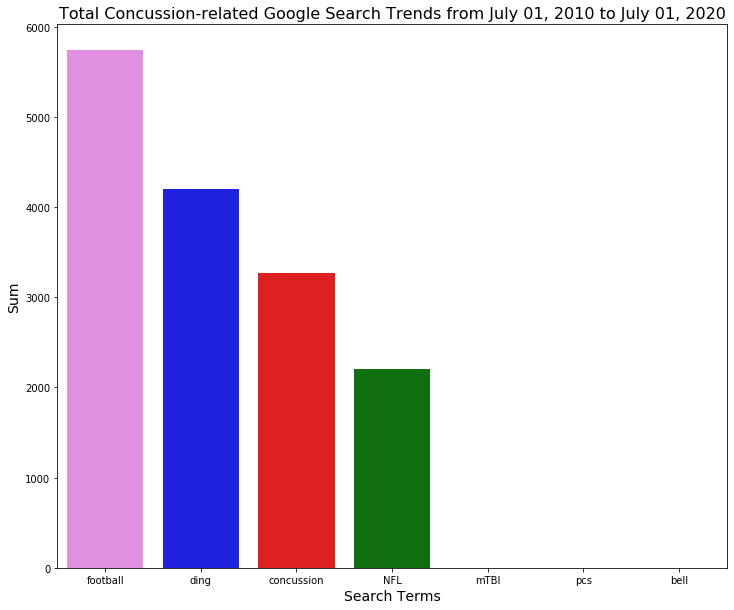

In [12]:
# Example

start_date = "2010-07-01"
end_date = "2020-07-01"

t = Trend(start_date, end_date)

t.histogram_terms()

The data show that 'football,' 'ding,' 'concussion,' and 'NFL' are the top four searches, in descending order.

To determine longitudinal changes in search frequency, I will create a function displaying the degree of interest over time.

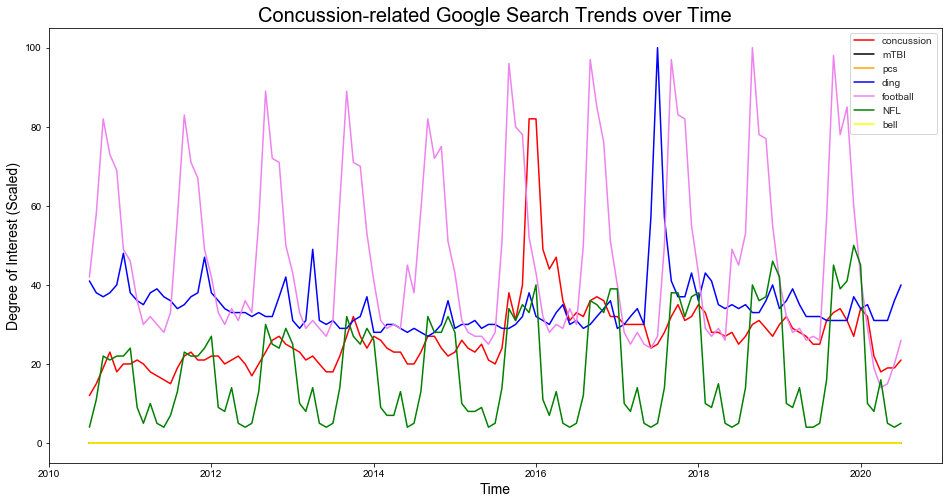

In [13]:
t.time_terms()

The data reveal three interesting points:

1. There is a predictable, almost cyclical pattern that shows that the top four search terms have discrete peaks and valleys that remain relatively stable over the decade of interest (2010 to 2020).


2. These cyclical patterns appear to coincide with one another (i.e., an increase in 'football' searches is generally associated with an increase in 'ding' and 'NFL' searches).


3. There are two interesting spikes in the graph:
    - There is a marked increase in interest regarding concussion in late 2015 and early 2016.
    - There is an atypical increase in the term 'ding' in late 2017.

In [14]:
geo, time_data = t.data_prep()
coordinates = t.prep_json()
geo_coord = merge_geos(geo, coordinates)
df = map_terms(geo_coord)
desc_stats, min_max = df_eda(df, time_data)

I'd like to know the proportion of DMAs contributing to each state count. 

In [15]:
geo_coord.id.unique()

array(['TX', 'GA', 'NY', 'NM', 'LA', 'MI', 'AK', 'CA', 'MD', 'ME', 'OR',
       'MS', 'AL', 'WV', 'ID', 'NH', 'KY', 'MT', 'WY', 'IA', 'IL', 'SC',
       'NC', 'VA', 'TN', 'NE', 'OH', 'CO', 'MO', 'WI', 'PA', 'IN', 'ND',
       'FL', 'AR', 'CT', 'HI', 'KS', 'NV', 'MN', 'OK', 'AZ', 'MA', 'SD',
       'UT', 'WA', 'D)'], dtype=object)

In [16]:
geo_coord.id.nunique()

47

There is a typo in the 'id' column ('D)') which should be converted to Maryland (MD). This changes our number of unique states from 47 to 46.

In [17]:
geo_coord['id'] = geo_coord['id'].replace(['D)'], 'MD')

In [18]:
geo_coord.id.nunique()

46

In [19]:
geo_coord['id'].value_counts()

TX    17
CA    12
NY    10
OH     9
FL     9
MI     7
GA     7
VA     6
IN     6
IL     6
LA     6
WI     6
PA     6
MS     6
MO     6
TN     5
NC     5
MT     5
AR     4
OK     4
WV     4
OR     4
SC     4
AL     4
IA     4
NE     4
MN     3
ID     3
MD     3
KS     3
WA     3
KY     3
ME     3
AK     3
CO     3
NV     2
AZ     2
SD     2
ND     2
MA     2
NM     1
HI     1
WY     1
UT     1
CT     1
NH     1
Name: id, dtype: int64

Texas contributes to 37% of the designated market regions in the United States, followed by California (26%) and New York (22%).

This overview encourages a more in-depth analysis. Below is a list of searches performed by state over this time period. As mentioned above, <b>Vermont</b>, <b>Rhode Island</b>, <b>New Jersey</b>, and <b>Delaware</b> are <u>not</u> included in the dataframe.

In [20]:
df

,id,concussion,mTBI,pcs,ding,football,NFL,bell,total
0,AK,203.0,0.0,0.0,97.0,143.0,157.0,0.0,581.357800
1,AL,252.0,0.0,0.0,148.0,346.0,54.0,0.0,679.592126
2,AR,262.0,0.0,0.0,138.0,302.0,98.0,0.0,676.433456
3,AZ,142.0,0.0,0.0,58.0,114.0,86.0,0.0,324.636411
4,CA,766.0,0.0,0.0,434.0,591.0,609.0,0.0,2070.727374
5,CO,230.0,0.0,0.0,70.0,159.0,141.0,0.0,487.485208
6,CT,75.0,0.0,0.0,25.0,52.0,48.0,0.0,166.612664
7,FL,559.0,0.0,0.0,341.0,606.0,294.0,0.0,1498.063866
8,GA,481.0,0.0,0.0,219.0,533.0,167.0,0.0,1145.241580
9,HI,59.0,0.0,0.0,41.0,56.0,44.0,0.0,162.306900


In [21]:
df.football.nlargest(3)

39    1039.0
32     630.0
7      606.0
Name: football, dtype: float64

In [22]:
df.ding.nlargest(3)

39    520.0
4     434.0
7     341.0
Name: ding, dtype: float64

In [23]:
df.concussion.nlargest(3)

39    1180.0
4      766.0
31     744.0
Name: concussion, dtype: float64

In [24]:
df.NFL.nlargest(3)

39    661.0
4     609.0
31    510.0
Name: NFL, dtype: float64

In [25]:
df.football.nsmallest(3)

29    47.0
6     52.0
28    52.0
Name: football, dtype: float64

In [26]:
df.ding.nsmallest(3)

45     0.0
6     25.0
28    26.0
Name: ding, dtype: float64

In [27]:
df.concussion.nsmallest(3)

9     59.0
29    73.0
40    73.0
Name: concussion, dtype: float64

In [28]:
df.NFL.nsmallest(3)

40    32.0
9     44.0
45    45.0
Name: NFL, dtype: float64

Texas leads the way in terms of concussion-related searches, as individuals from this state researched 'football', 'ding', 'concussion', and 'NFL' more than any other state in the country. 

<u><b>Top three states with the highest Google searches:</u></b>

<i>Football: </i> 1) Texas, 2) Ohio, 3) Florida

<i>Ding: </i> 1) Texas, 2) California, 3) Florida

<i>Concussion: </i> 1) Texas, 2) Ohio, 3) New York

<i>NFL: </i> 1) Texas, 2) Ohio, 3) New York

<u><b>Top three states with the lowest Google searches:</u></b>

<i>Football: </i> 1) New Mexico, 2) New Hampshire, 3) Connecticut

<i>Ding: </i> 1) Wyoming, 2) Connecticut, 3) New Hampshire

<i>Concussion: </i> 1) Hawaii, 2) Utah, 3) New Hampshire

<i>NFL: </i> 1) Utah, 2) Hawaii, 3) Wyoming


Below is a dataframe containing the smallest and largest search instances across time.

In [29]:
min_max

,Date,concussion,ding,football,NFL,Association
0,2010-07-01,12,41,42,4,smallest - concussion
65,2015-12-01,82,38,52,33,largest - concussion
66,2016-01-01,82,32,43,40,largest - concussion
50,2014-09-01,27,27,82,32,smallest - ding
84,2017-07-01,25,100,27,5,largest - ding
117,2020-04-01,18,31,14,16,smallest - football
98,2018-09-01,30,33,100,40,largest - football
0,2010-07-01,12,41,42,4,smallest - NFL
11,2011-06-01,16,37,28,4,smallest - NFL
23,2012-06-01,20,33,36,4,smallest - NFL


As mentioned (and shown) above, there were two interesting spikes in the graph: 1) 'concussion' (late 2015 and early 2016) and 2) 'ding' (July 2017).

A few factors can explain why:

- A Google search indicates that the movie "Concussion" starring Will Smith was released on December 25, 2015 in the United States, resulting in innumerous internet articles being published about sports-related concussion.


- A Google Trends search for the word 'ding' in the date range of June 1, 2017 to August 31, 2017 showed that this search term was associated with queries related to the Dallas Mavericks. Less importantly, search frequency was also related to non-sports-related issues (e.g., food).


- Additionally, a spike in football searches in September 2016 and September 2018 was associated with football playoffs in the United States, including the University of Central Florida soccer and football teams, and Purdue University's football team.


- A Google search suggested that a significant increase in NFL-related searches (e.g., December 2019) was related to the announcement or the timing of the NFL playoffs.

Unsurprisingly, it appears that the increase in these search terms is related to major football games in the country and major forms of entertainment which focused on brain injuries in athletes (e.g., "Concussion" the movie).

In [30]:
desc_stats, min_max = df_eda(df, time_data)

In [31]:
desc_stats

,count,mean,std,min,25%,50%,75%,max
concussion,46.0,321.543478,216.666021,59.000000,188.750000,273.500000,432.000000,1180.00000
mTBI,46.0,0.021739,0.147442,0.000000,0.000000,0.000000,0.000000,1.00000
pcs,46.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
ding,46.0,128.434783,100.815927,0.000000,66.250000,112.000000,158.750000,520.00000
football,46.0,287.913043,196.533608,47.000000,136.250000,292.500000,378.250000,1039.00000
NFL,46.0,166.434783,132.551148,32.000000,98.250000,130.000000,201.750000,661.00000
bell,46.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
total,46.0,756.412037,515.149734,143.412869,482.787777,670.073389,986.545456,2740.77477


Across the 46 states identified above, the average number of searches per state was 287 ('football'), 128 ('ding'), 322 ('concussion'), and 167 ('NFL').

An interactive map can help to visualize these general trends. To display the .html map in a separate window, I will call the method below.

In [32]:
df = map_terms(geo_coord)

## [Link to html map for concussion-related Google search terms by kkphd](https://bit.ly/3ghv5va)

#### Below is an image mapping the four top search terms ('football,' 'ding,' 'concussion,' and 'NFL') across the contiguous United States (July 2010 to July 2020).

![All Searches](map.png)

#### Below is an image mapping 'football' searches across the contiguous United States (July 2010 to July 2020).

![Football Searches](football_map.png)

#### Below is an image mapping 'ding' searches across the contiguous United States (July 2010 to July 2020).

![Ding Searches](ding_map.png)

#### Below is an image mapping 'concussion' searches across the contiguous United States (July 2010 to July 2020).

![Concussion Searches](concussion_map.png)

#### Below is an image mapping 'NFL' searches across the contiguous United States (July 2010 to July 2020).

![NFL Searches](NFL_map.png)

#### Discussion:

The purpose of this study was to track the frequency of football and football-related concussion searches from a somewhat arbitrary period of time (July 2010 to July 2020). 

<b>1. Hypothesis: An increase in football and football-related concussion would be positively related to social factors.</b>

As seen in the time function above and in subsequent exploratory data analyses, public interest in concussion generally followed a predictable pattern that appeared to be related to major sports events or film releases. Some of these searches were confounded by non-related trends, such as food, although this did not appear to be a remarkable factor impacting the relative increase in searches over time.

Texas led the way in terms of concussion-related searches across the 10-year period, as individuals from this state researched 'football', 'ding', 'concussion', and 'NFL' more than any other state in the country. However, this was probably due to the fact that Texas contributed to almost 40% of the total DMAs in the country. Ohio was second for most other searches, followed by California, New York, or Florida (although New York and California's relatively greater proportion of market regions in the States probably affected this finding). 

Conversely, New Mexico, Wyoming, Connecticut, New Hampshire, Utah, and Hawaii were the states least interested in football or football-associated concussion. This isn't necessarily surprising, as these states either do not possess a major professional sports team, are less densely populated, and/or have residents who are relatively less interested in football than other states (Sports in the United States, n.d.). 

There were limitations to the current analysis:
- Our ceiling was limited by Google, as our maximum search quantity per keyword was limited to 200.
- There are numerous keywords that can be used to assess population interest in concussion; using other search terms may have  garnered different results.
- While Google is the most popular search engine on the internet, some users may have performed their searches by using other search engines. These searches were not integrated into this study.
- Our state-level data was derived from DMAs established by Neilsen, which does not necessarily cover all areas within a particular state. It is possible that there were regions not subsumed under the DMA parameters that may have altered the pattern of our results. 
- On a similar note, there were a few states that were not included in our analyses at all (Vermont, Rhode Island, New Jersey, and Delaware), most likely due to the fact that the states were small and market regions were included in neighboring states' areas. 

Although these results are rather intuitive, having data to substantiate these impressions is important. In terms of medical providers' response to patients' concerns about head injury, they may be interested in being mindful of: 1) the timing of patients' report of concussion symptoms (i.e., patients may report more symptoms if there is a sports event or form of entertainment that has to do with concussion near the time of their visit), and 2) individuals from certain states may be more likely to report concussion symptoms. However, we could make a more confident statement about point number two if there was a relatively proportionate representation of DMAs per state.

### References

Powell, M.R. & McCrea, M. (2011). Concussion. In J. S. Kreutzer, J. DeLuca, & B. Caplan (Eds.), <i>Encyclopedia of clinical neuropsychology</i> (pp. 907-909). Springer.

Sports in the United States by state. (n.d.). In <i>Wikipedia</i>. Retrieved July 31, 2020, from https://en.wikipedia.org/wiki/Sports_in_the_United_States_by_state.

Media market. (n.d.). In <i>Wikipedia</i>. Retrieved August 1, 2020, from https://en.wikipedia.org/wiki/Media_market.